In [3]:
#import config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA


In [37]:
absenteeism = pd.read_csv("Absenteeism_at_work_train.csv")

print(absenteeism.head())


   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time Age  \
0                     289                               36            13  33   
1                     118                               13            18  50   
2                     179                               51            18  38   
3                     279                                5            14  39   
4                     289                               36            13  33   

  Work load Average/day   ...  Disciplinary failure  Education  Son  \
0        

In [38]:
absenteeism.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,664.000000,666.000000,666.000000,666.000000
mean,17.674174,19.469970,6.441441,3.893393,2.552553,222.818318,30.370871,12.699700,94.410526,0.054054,1.246246,1.028529,0.584084,0.069069,0.690691,79.210843,171.869369,26.815315,6.752252
std,11.075428,8.345175,3.573128,1.423451,1.134994,66.853234,14.905486,4.353883,3.827399,0.226294,0.617557,1.125546,0.493250,0.253762,1.175107,12.634225,5.930631,4.238081,12.666938
min,1.000000,0.000000,1.000000,2.000000,1.000000,0.000000,5.000000,1.000000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,7.000000,13.000000,3.000000,3.000000,2.000000,179.000000,17.000000,9.000000,92.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,7.000000,4.000000,2.000000,225.000000,26.000000,13.000000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [39]:

absenteeism.info()
# Age and Work load Average/day need to be converted from object to Integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               666 non-null    int64  
 1   Reason for absence               666 non-null    int64  
 2   Month of absence                 666 non-null    int64  
 3   Day of the week                  666 non-null    int64  
 4   Seasons                          666 non-null    int64  
 5   Transportation expense           666 non-null    int64  
 6   Distance from Residence to Work  666 non-null    int64  
 7   Service time                     666 non-null    int64  
 8   Age                              666 non-null    object 
 9   Work load Average/day            666 non-null    object 
 10  Hit target                       665 non-null    float64
 11  Disciplinary failure             666 non-null    int64  
 12  Education             

In [40]:
absenteeism.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                 object
Work load Average/day               object
Hit target                         float64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                             float64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [41]:
# Check missing values

absenteeism.isnull().sum()

# Weight and Hit target has missing values

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         1
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             2
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [42]:
# Drop NAs

absenteeism = absenteeism.dropna(axis = 0)

absenteeism.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [43]:
# Check Age column values

# We see 'R' as a value for Age in a row. Update it to 0
absenteeism.loc[absenteeism.Age == 'R'] = 0

# Convert the column to numeric
absenteeism[['Age']] = absenteeism[['Age']].apply(pd.to_numeric)



In [44]:
# To convert 'Work load Average/day' column from object to numeric remove the commas in the values

absenteeism.replace(',','', regex=True, inplace=True)

# Convert the column to numeric
absenteeism["Work load Average/day "] = pd.to_numeric(absenteeism["Work load Average/day "], errors='ignore')

# Renaming the column name to remove the blank space 
absenteeism.rename(columns = {'Work load Average/day ':'Work_load_Average'}, inplace = True)



In [45]:
# categorising the independdent variables in to category " Continuos" and "Categorical"
continuous_vars = ['Distance from Residence to Work', 'Service time', 'Age', 'Work_load_Average', 'Transportation expense',
       'Hit target', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

categorical_vars = ['ID','Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']

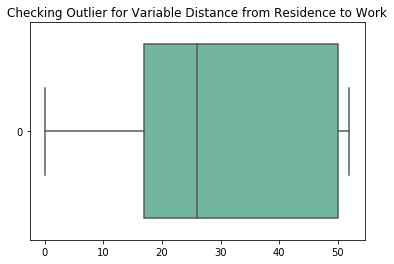

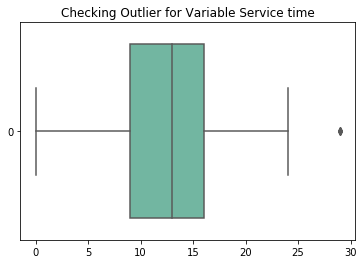

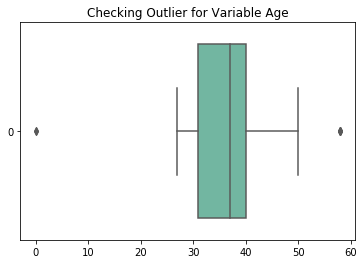

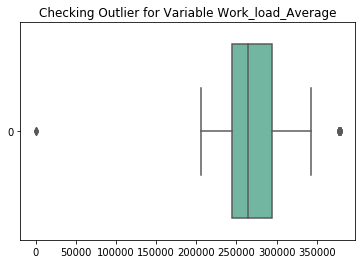

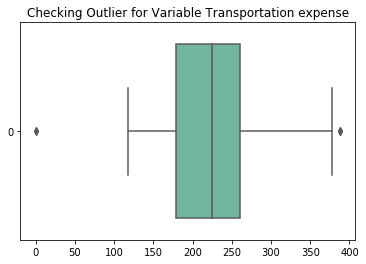

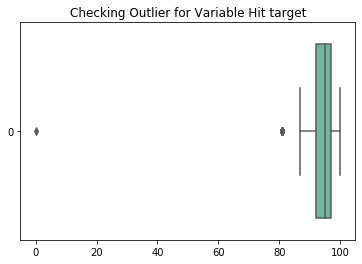

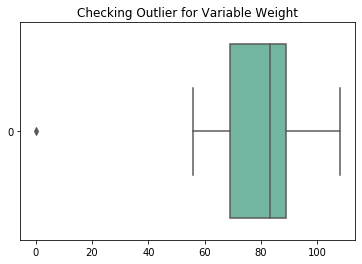

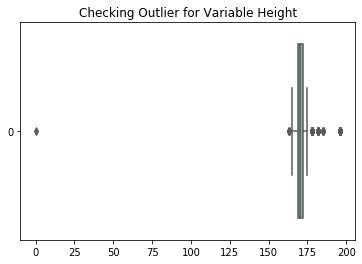

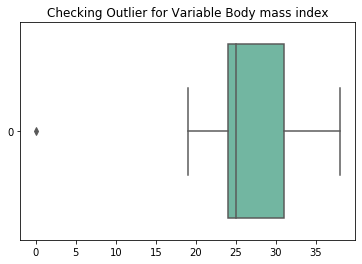

In [47]:
# Outlier check using boxplot

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.boxplot(data = absenteeism[i], orient="h", palette="Set2")
    plt.title("Checking Outlier for Variable "+str(i))
    plt.show()
 
# We can see outliers in Service time,Age, wor_load_Average per day, Transportation expense, Hit target, Weight, Height, Body Mass index,


In [49]:
# Outlier treatement

# Identify the continuous independent variable with outlier and replace the outliers with the lower bound and upper bound values

# We are treating outliers in all the continous variables except the dependent variable
# The outlier in the dependent variable could be inflencial

for col in continuous_vars : 
    if col == 'Absenteeism time in hours':
        continue
    q1 = absenteeism[col].quantile(.25)
    q3 = absenteeism[col].quantile(.75)
    OQR = q3 - q1
    lb = q1-(q3-q1)*1.5
    ub = q3+(q3-q1)*1.5
    absenteeism[col] = np.where(absenteeism[col] < lb, lb,absenteeism[col])
    absenteeism[col] = np.where(absenteeism[col] > ub, ub,absenteeism[col])



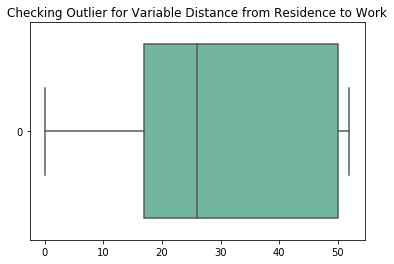

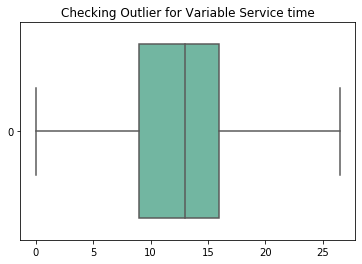

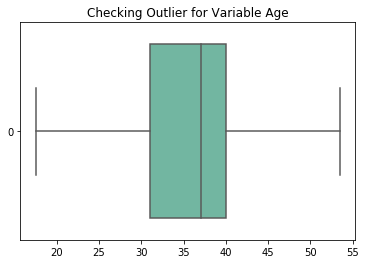

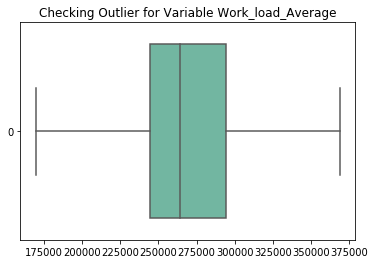

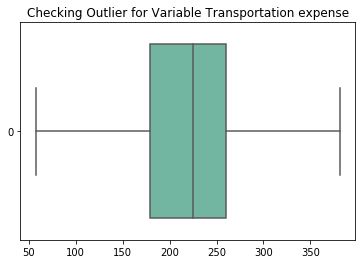

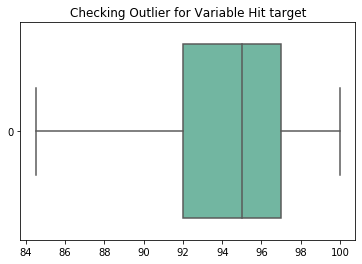

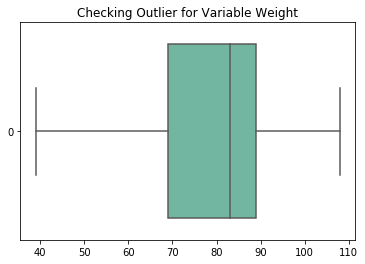

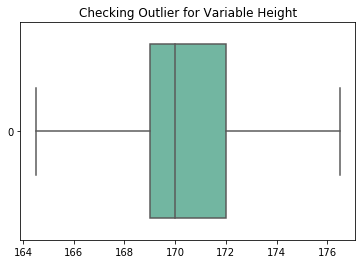

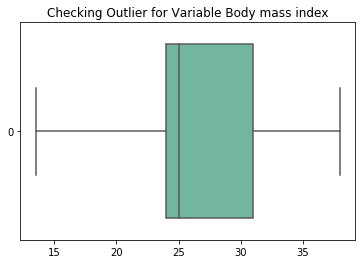

In [50]:
# Check outliers post outlier treatment

for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.boxplot(data = absenteeism[i], orient="h", palette="Set2")
    plt.title("Checking Outlier for Variable "+str(i))
    plt.show()
 
# plot shows that the outliers are updated

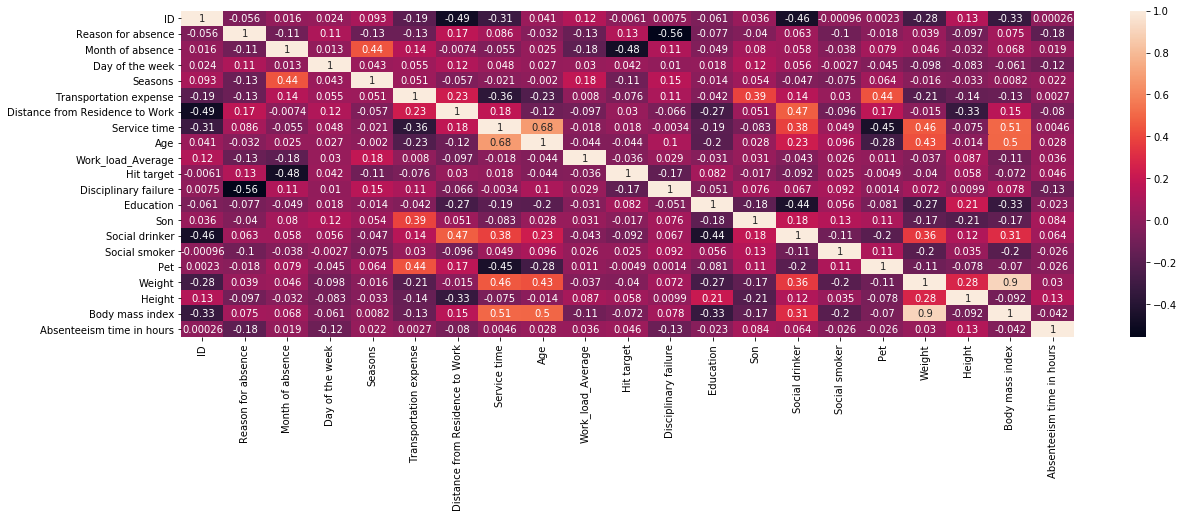

In [25]:
# Check the correlation between the variables using heatmap

plt.figure(figsize = (20,6))
sns.heatmap(absenteeism.corr(), annot = True)
plt.show()

# With the help of correlation plot we can see that Body Mass Index and Weight has high correlation near to 1. 
# Which determines that we can drop one of the variable from the dataset. 
# Similarly Service time and Age has a significant correlation too

In [ ]:
# Check the bar graph of categorical Data using factorplot
sns.set_style("whitegrid")
sns.factorplot(data=absenteeism, x='Reason for absence', kind= 'count',size=4,aspect=2)
sns.factorplot(data=absenteeism, x='Seasons', kind= 'count',size=4,aspect=2)
sns.factorplot(data=absenteeism, x='Education', kind= 'count',size=4,aspect=2)
sns.factorplot(data=absenteeism, x='Disciplinary failure', kind= 'count',size=4,aspect=2)

In [ ]:
plt.hist(data=absenteeism, x='Weight', bins='auto', label='Weight')
plt.xlabel('Weight')
plt.title("Weight Distribution")

In [ ]:
# Check the distribution of numerical data using histogram
plt.hist(data=absenteeism, x='Age', bins='auto', label='Age')
plt.xlabel('Age')
plt.title("Age Distribution")

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Age']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Age")
plt.show()

In [ ]:
x = absenteeism['Reason for absence']
y = absenteeism['Absenteeism time in hours']
plt.scatter(x, y, alpha=0.5)
plt.xlabel("Reason for Absence")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Reason of Absence")
plt.show()

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 663
x = absenteeism['Day of the week']
y = absenteeism['Absenteeism time in hours']
colors = np.random.rand(N)
plt.scatter(x, y, c=colors, alpha=0.2)
plt.xlabel("Day of the week")
plt.ylabel("Absenteeism time in hours")
plt.title("Distribution of Absenteeism time by Day of the week")
plt.show()

## Feature Selection

In [27]:
# Get dataframe with all continuous variables
absenteeism_corr = absenteeism.loc[:,continuous_vars]

[]

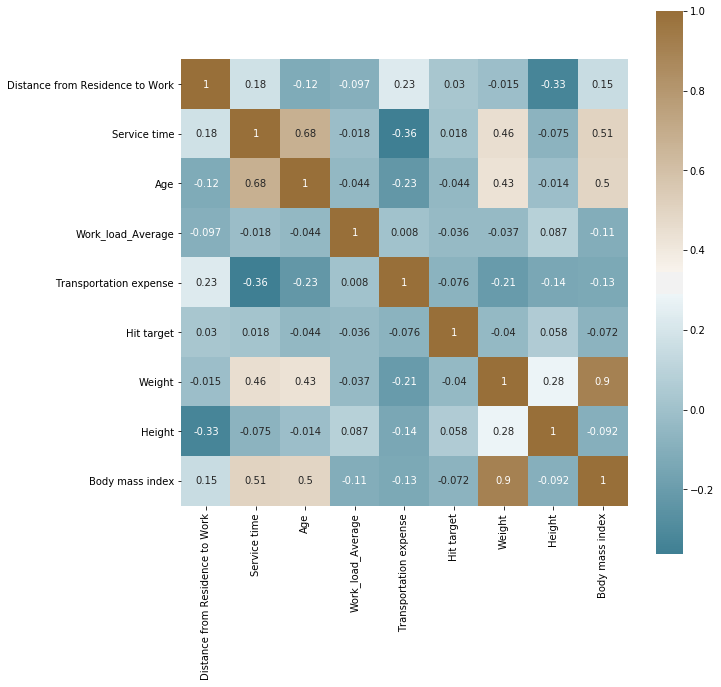

In [28]:
# Check for multicollinearity using corelation graph
# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 10))

# Generate correlation matrix
corr = absenteeism_corr.corr()

# Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()

In [29]:
# Variable Reduction
to_drop = ['Weight']
absenteeism = absenteeism.drop(to_drop, axis = 1)

In [30]:
# Updating the Continuous and Categorical Variables
continuous_vars.remove('Weight')

In [31]:
# Make a copy of clean data and export it as excel file
clean_data = absenteeism.copy()

In [32]:
continuous_vars

['Distance from Residence to Work',
 'Service time',
 'Age',
 'Work_load_Average',
 'Transportation expense',
 'Hit target',
 'Height',
 'Body mass index']

## Feature Scaling

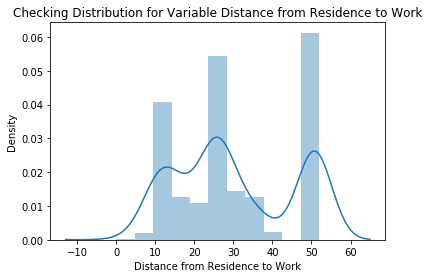

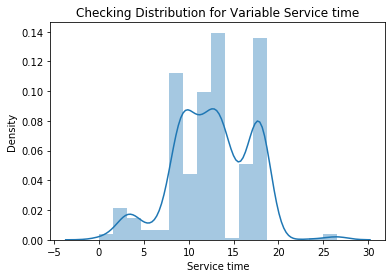

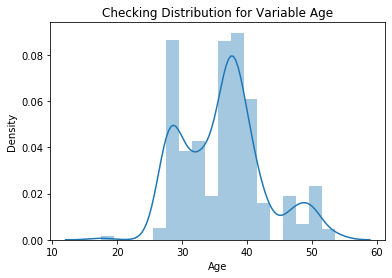

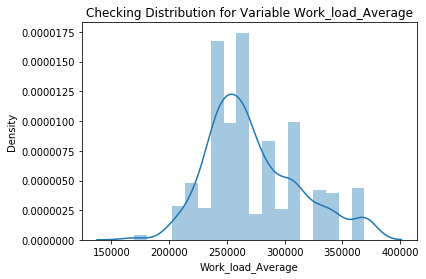

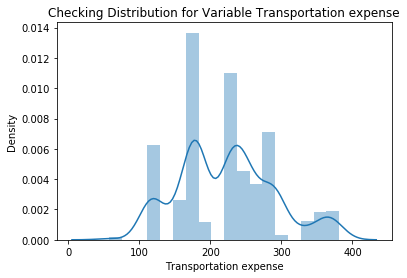

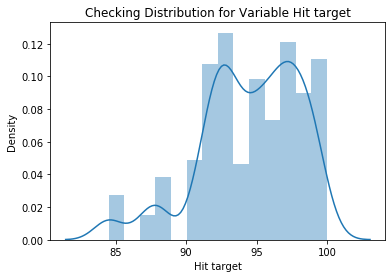

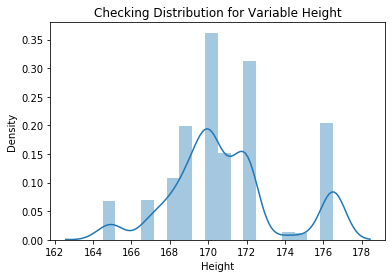

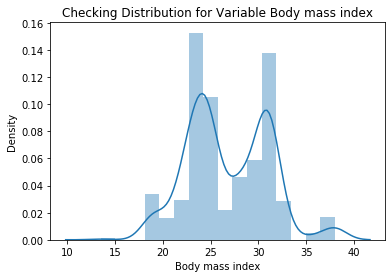

In [33]:
# Normality check
for i in continuous_vars:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(absenteeism[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [ ]:
# Normalization of continuous variables
for i in continuous_variables:
    if i == 'Absenteeism time in hours':
        continue
    absenteeism[i] = (absenteeism[i] - absenteeism[i].min())/(absenteeism[i].max()-absenteeism[i].min())

## Machine Learning Models

In [ ]:
# Create dummy variables of factor variables
absenteeism = pd.get_dummies(data = absenteeism, columns = categorical_variables)

# Copying dataframe
absenteeism_copy = absenteeism.copy()

In [ ]:
# Get number of rows and columns
absenteeism.shape

In [ ]:
# Observe the first row
absenteeism.head(1)

In [ ]:
# Splitting data into train and test data

X_train, X_test, y_train, y_test = train_test_split(
    absenteeism.iloc[:, absenteeism.columns != 'Absenteeism time in hours'], 
    absenteeism.iloc[:, 8], test_size = 0.20, random_state = 1
)

## Decision Tree

In [ ]:
# Build decsion tree using DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state = 1).fit(X_train, y_train)

# Perdict for test cases
decision_tree_predictions = decision_tree_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_decision_tree = pd.DataFrame({'actual': y_test, 'pred': decision_tree_predictions})
print(absenteeism_decision_tree.head())

# Define function to calculate RMSE
def RMSE(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(RMSE(y_test, decision_tree_predictions))))
print("R#^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, decision_tree_predictions))))

## Random Forest

In [ ]:
# Build random forest using RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators = 500, random_state = 1).fit(X_train,y_train)

# Perdict for test cases
random_forest_model_predictions = random_forest_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_random_forest = pd.DataFrame({'actual': y_test, 'pred': random_forest_model_predictions})
print(absenteeism_random_forest.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(RMSE(y_test, random_forest_model_predictions))))
print("R#^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, random_forest_model_predictions))))

## Linear Regression

In [ ]:
# Train the model
linear_regression_model = LinearRegression().fit(X_train , y_train)

# Perdict for test cases
linear_regression_predictions = linear_regression_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_linear_regression = pd.DataFrame({'actual': y_test, 'pred': linear_regression_predictions})
print(absenteeism_linear_regression.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(RMSE(y_test, linear_regression_predictions))))
print("R^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, linear_regression_predictions))))

## Dimension Reduction using PCA

In [ ]:
# Get the target variable
target = absenteeism['Absenteeism time in hours']

In [ ]:
# Get the number of rows and columns of data
absenteeism.shape

In [ ]:
# Converting data to numpy array
X = absenteeism.values

# Data has 116 variables so no of components of PCA = 115
pca = PCA(n_components=115)
pca.fit(X)

# Proportion of variance explained
e xplained_variance_ratio = pca.explained_variance_ratio_

#Cumulative scree plot
cum_sum = np.cumsum(np.round(explained_variance_ratio, decimals=4)*100)

# Draw the plot
plt.plot(cum_sum)
plt.show()

In [ ]:
# Selecting 45 components since it explains almost 95+ % data variance
pca = PCA(n_components=45)

# Fitting the selected components to the data
pca.fit(X)

#S plitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state = 1)

## Decision Tree

In [ ]:
# Build decsion tree using DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=1).fit(X_train,y_train)

# Perdict for test cases
decision_tree_predictions = decision_tree_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_decision_tree = pd.DataFrame({'actual': y_test, 'pred': decision_tree_predictions})
print(absenteeism_decision_tree.head())

#C alculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(RMSE(y_test, decision_tree_predictions))))
print("R^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, decision_tree_predictions))))

## Random Forest

In [ ]:
# Build random forest using RandomForestRegressor
random_forest_model = RandomForestRegressor(n_estimators=500, random_state=1).fit(X_train,y_train)

# Perdict for test cases
random_forest_predictions = random_forest_model.predict(X_test)

# Create data frame for actual and predicted values
absenteeism_random_forest_predictions = pd.DataFrame({'actual': y_test, 'pred': random_forest_predictions})
print(absenteeism_random_forest_predictions.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: {}".format(str(RMSE(y_test, random_forest_predictions))))
print("R^2 Score(coefficient of determination): {}".format(str(r2_score(y_test, random_forest_predictions))))

## Linear Regression

In [ ]:
# Train the model
lr_model = LinearRegression().fit(X_train , y_train)

# Perdict for test cases
lr_predictions = lr_model.predict(X_test)

# Create data frame for actual and predicted values
df_lr = pd.DataFrame({'actual': y_test, 'pred': lr_predictions})
print(df_lr.head())

# Calculate RMSE and R-squared value
print("Root Mean Squared Error: "+str(RMSE(y_test, lr_predictions)))
print("R^2 Score(coefficient of determination) = "+str(r2_score(y_test, lr_predictions)))